In [241]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [242]:
df = pd.read_csv('/Users/jdobrow/Desktop/Data Science/Boston Marathon Results 2014/2014/results.csv')

In [247]:
df

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [250]:
len(df[df.gender == 'F'])

14367

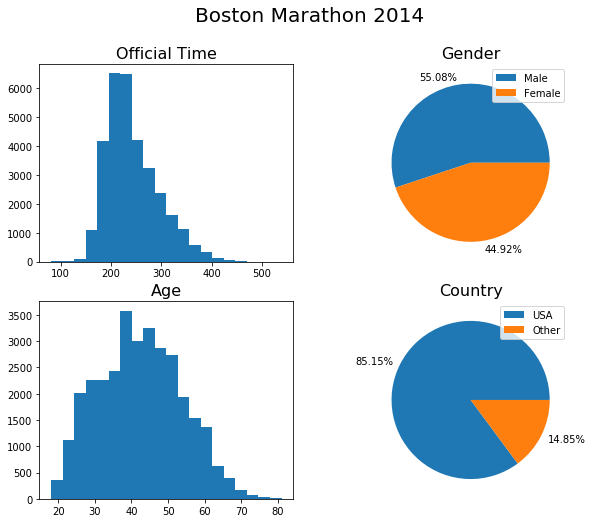

In [290]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
fig.suptitle('Boston Marathon 2014', fontsize=20)
ax[0,0].hist(df['official'], bins=20)
ax[0,0].set_title('Official Time', fontsize=16)
ax[0,1].pie([len(df[df.gender == 'M']), len(df[df.gender == 'F'])], labels=[str(round(len(df[df.gender == 'M'])/len(df) * 100, 2)) + '%', str(round(len(df[df.gender == 'F'])/len(df) * 100, 2)) + '%'])
ax[0,1].legend(['Male', 'Female'])
ax[0,1].set_title('Gender', fontsize=16)
ax[1,0].hist(df['age'], bins=20)
ax[1,0].set_title('Age', fontsize=16)
ax[1,1].pie([len(df[df.country == 'USA']), len(df[df.country != 'USA'])], labels=[str(round(len(df[df.country == 'USA'])/len(df) * 100, 2)) + '%', str(round(len(df[df.country != 'USA'])/len(df) * 100, 2)) + '%'])
ax[1,1].set_title('Country', fontsize=16)
ax[1,1].legend(['USA', 'Other'])
plt.show()

In [194]:
# State has some missing values but that's from the international runners
# I couldn't find documentation on ctz, but I'm guessing it is birth country for US runners not born in the U.S.
# 5k, 10k, 20k etc....time at various checkmarks. official is the finish time.
# pace??
# bib is just ID, not useful
# overall is place. genderdiv is place within gender
# I had runtime issues so I decided to knock out a couple of the thresholds.
# made country into a dummy variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [195]:
reference_df = df.drop(['bib', 'ctz', 'state', 'city', '10k', '25k', '35k', '20k', '30k', '40k', 'pace', 'division', 'genderdiv', 'overall', '5k', 'half'], 1)
main_df = reference_df.drop('name', 1)

In [196]:
gender_list = []
for i in main_df.gender:
    if i == 'M':
        gender_list.append(1)
    else:
        gender_list.append(0)
main_df['gender'] = gender_list

country_dummy = []
for i in main_df.country:
    if i == 'USA':
        country_dummy.append(1)
    else:
        country_dummy.append(0)
main_df['country'] = country_dummy

In [198]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 4 columns):
gender      31984 non-null int64
age         31984 non-null int64
official    31984 non-null float64
country     31984 non-null int64
dtypes: float64(1), int64(3)
memory usage: 999.6 KB


In [293]:
# Some options. Normal df seems to be grouping too much by the binary variables, and that's most likely because
# the standard deviation is so much higher for a 0 and 1 variable. Standardized df is probably more useful.
normal_df = pd.DataFrame()
for column in main_df:
    normal_df[column] = (main_df[column]-main_df[column].min())/(main_df[column].max())

standardized_df = pd.DataFrame()
for column in main_df:
    standardized_df[column] = (main_df[column] - np.mean(main_df[column]))/(np.std(main_df[column]))
standardized_df['gender'] *= .8
standardized_df['country'] *= .8

In [208]:
print('Percent Men: ', len(main_df[main_df.gender == 1])/len(main_df))
print('Percent U.S.: ', len(main_df[main_df.country == 1])/len(main_df))

Percent Men:  0.5508066533266633
Percent U.S.:  0.8514569784892446


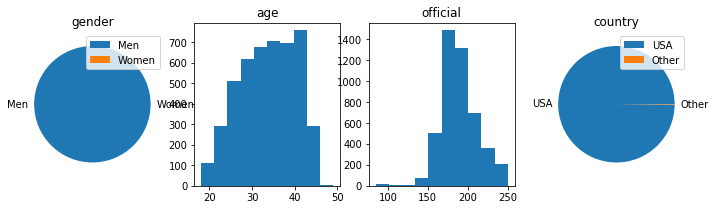

Number in Cluster 4668
Age mean:  33.66559554413025 Standard dev:  6.287782025040892
Official mean:  189.4927335047127 Standard dev:  22.18234953264527


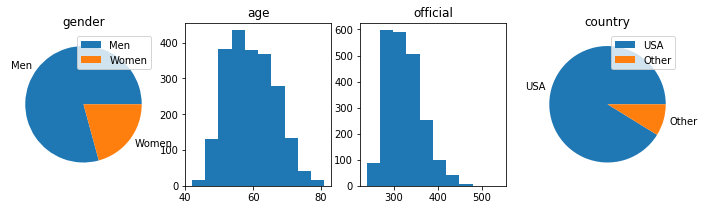

Number in Cluster 2181
Age mean:  59.38697845025218 Standard dev:  7.147858417582934
Official mean:  324.08368179734094 Standard dev:  39.64783276636654


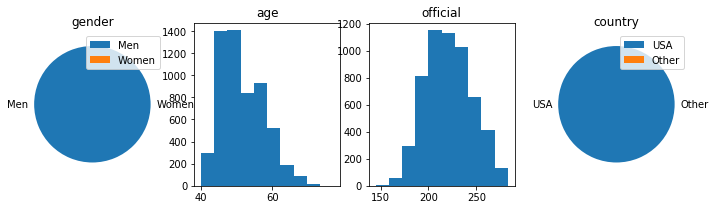

Number in Cluster 5681
Age mean:  51.59654990318606 Standard dev:  5.980477721631446
Official mean:  221.420711142405 Standard dev:  24.04535431639957


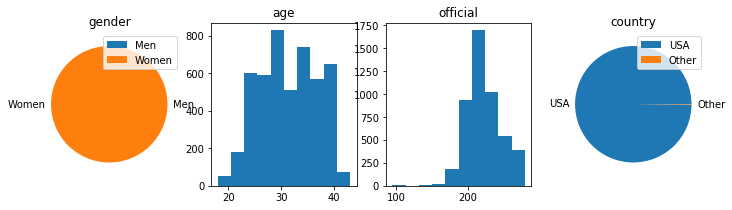

Number in Cluster 4809
Age mean:  31.169473903098357 Standard dev:  5.437691803888914
Official mean:  222.21705967976703 Standard dev:  23.485718904845374


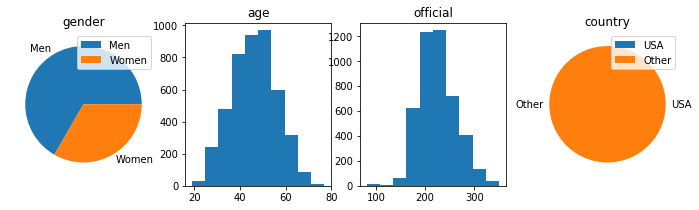

Number in Cluster 4486
Age mean:  46.17699509585377 Standard dev:  9.63589785100399
Official mean:  225.20351092287132 Standard dev:  37.29011850323758


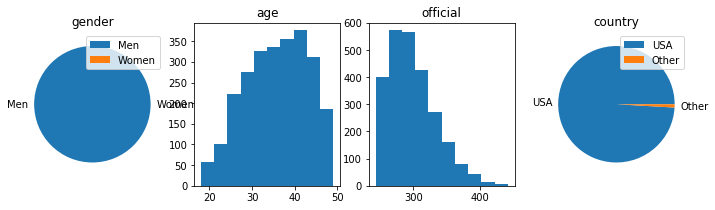

Number in Cluster 2545
Age mean:  35.66286836935167 Standard dev:  7.021234731552666
Official mean:  298.95468369351687 Standard dev:  35.29132628940672


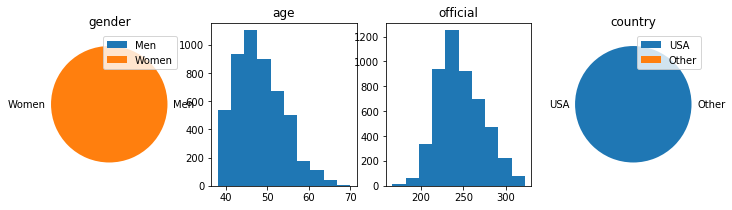

Number in Cluster 4988
Age mean:  48.07457898957498 Standard dev:  5.630429423085545
Official mean:  246.24743785084206 Standard dev:  26.104050462187388


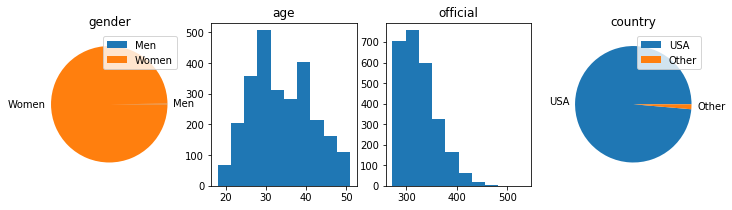

Number in Cluster 2626
Age mean:  33.87357197258187 Standard dev:  7.578983093244369
Official mean:  325.4873457730392 Standard dev:  35.33834607225749


In [211]:
# 8 clusters: 1. Fast Old US Men, 2. Slowest group, mostly women, all countries, but more U.S. than avg slightly.
# 3. Professional, international runners, 4. Professional, U.S., women 5. Old people. Generally slower, balanced
# between U.S and international, mostly men. 6. Non-professional but young. Mostly U.S, not the best results.
# 7. Top Runners. Almost all men, almost all U.S. 8. Older U.S. Women
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(standardized_df)
explore_df = main_df.copy()
explore_df['Kmeans8'] = y_pred


for i in range(8):
    df0 = explore_df[explore_df.Kmeans8 == i]
    fig, ax = plt.subplots(1,4, figsize=(12,3))
    ax[0].pie([len(df0[df0.gender == 1]),len(df0[df0.gender == 0])], labels = ['Men', 'Women'])
    ax[0].legend()
    ax[1].hist(df0.age)
    ax[2].hist(df0.official)
    ax[3].pie([len(df0[df0.country == 1]),len(df0[df0.country == 0])], labels = ['USA', 'Other'])
    ax[3].legend()
    for j in range(4):
        ax[j].set_title(df0.columns[j])
    plt.show()
    print('Number in Cluster', len(df0))
    print('Age mean: ', np.mean(df0.age), 'Standard dev: ', np.std(df0.age))
    print('Official mean: ', np.mean(df0.official), 'Standard dev: ', np.std(df0.official))

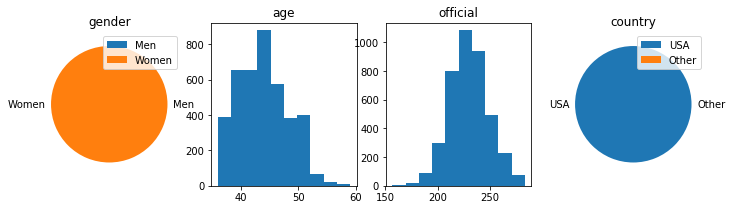

Number in Cluster 4033
Age mean:  43.93057277460947 Standard dev:  4.308019047346043
Official mean:  230.1958170096703 Standard dev:  18.733755935179346


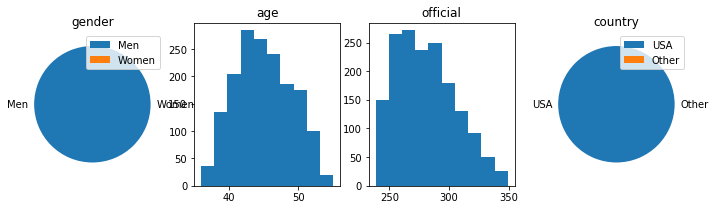

Number in Cluster 1651
Age mean:  44.97577225923683 Standard dev:  4.213921642478163
Official mean:  280.94372501514243 Standard dev:  24.798267067284645


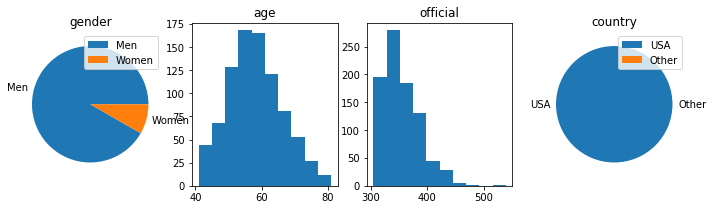

Number in Cluster 868
Age mean:  57.634792626728114 Standard dev:  8.167544886508145
Official mean:  353.8921774193544 Standard dev:  32.04453125921645


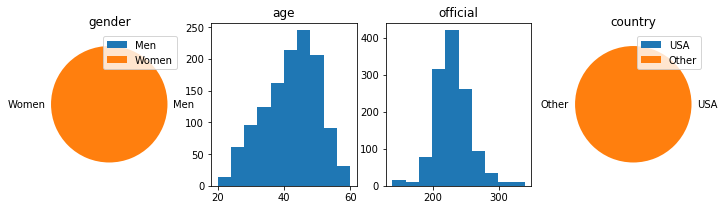

Number in Cluster 1246
Age mean:  41.6637239165329 Standard dev:  8.120980315512016
Official mean:  230.60741573033678 Standard dev:  27.147303128631886


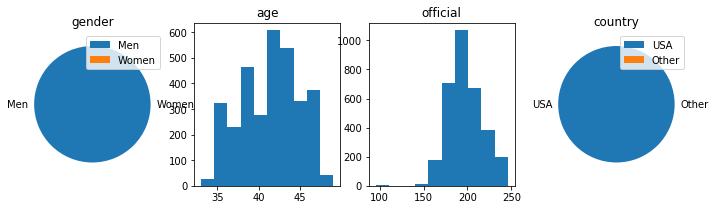

Number in Cluster 3219
Age mean:  41.30910220565393 Standard dev:  3.486869850758345
Official mean:  197.5854892823858 Standard dev:  19.16709469412296


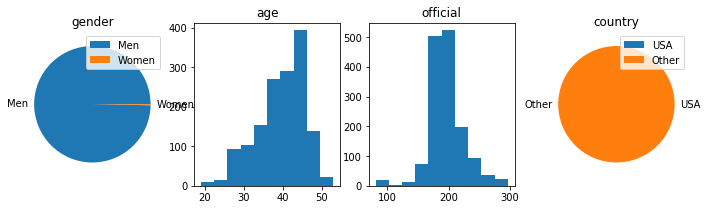

Number in Cluster 1486
Age mean:  39.565948855989234 Standard dev:  6.151137997334843
Official mean:  196.1829676985195 Standard dev:  28.584028458485523


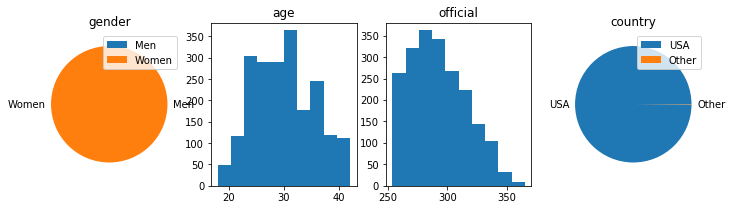

Number in Cluster 2069
Age mean:  29.968100531657807 Standard dev:  5.441720518511568
Official mean:  292.7029289511846 Standard dev:  23.54892973908238


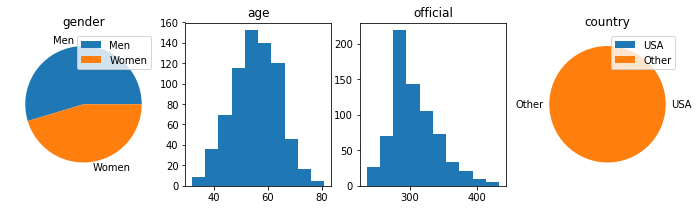

Number in Cluster 708
Age mean:  55.51412429378531 Standard dev:  8.749887711713896
Official mean:  306.49817796610193 Standard dev:  35.0033010136142


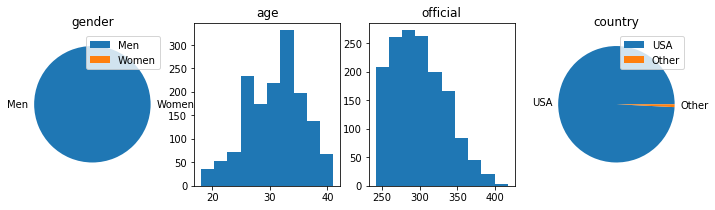

Number in Cluster 1522
Age mean:  30.90144546649146 Standard dev:  4.916197638896065
Official mean:  299.513252299606 Standard dev:  35.054813299750535


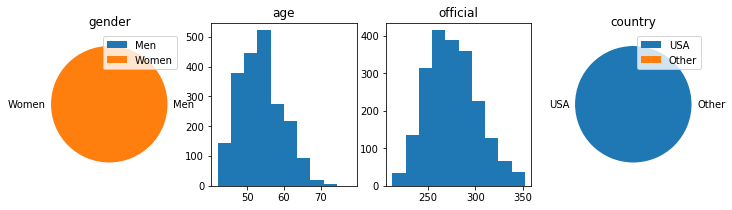

Number in Cluster 2102
Age mean:  53.6255946717412 Standard dev:  5.7265777871736026
Official mean:  275.8351379638442 Standard dev:  26.422743905303406


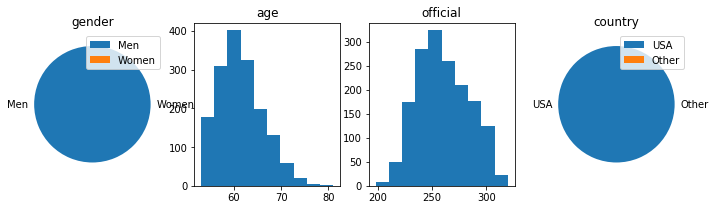

Number in Cluster 1630
Age mean:  61.355828220858896 Standard dev:  4.655731979503373
Official mean:  260.48896932515333 Standard dev:  23.334944015129828


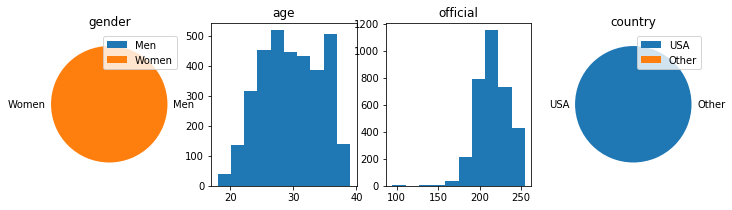

Number in Cluster 3370
Age mean:  29.61780415430267 Standard dev:  4.466682853347164
Official mean:  215.5958367952523 Standard dev:  18.90148903818437


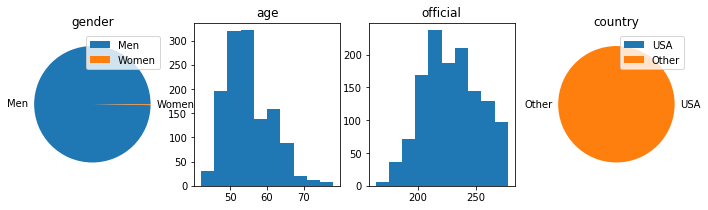

Number in Cluster 1290
Age mean:  54.81782945736434 Standard dev:  6.087615457255104
Official mean:  229.05865891472868 Standard dev:  23.846806910557152


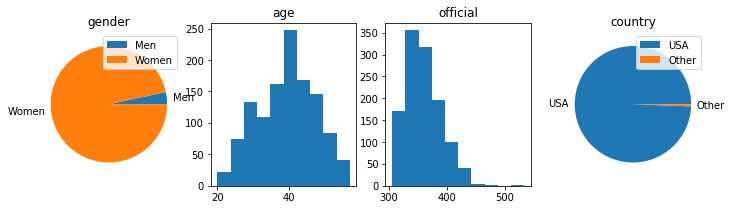

Number in Cluster 1187
Age mean:  39.38837405223252 Standard dev:  7.931677479216222
Official mean:  359.64840775063146 Standard dev:  30.226835077391577


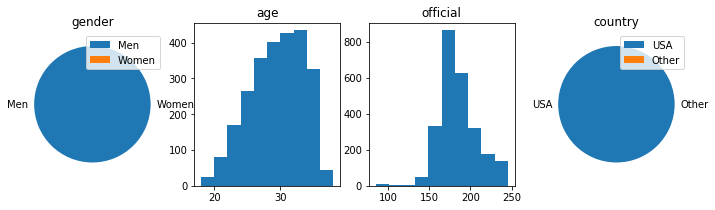

Number in Cluster 2531
Age mean:  28.984986171473725 Standard dev:  4.058317937061564
Official mean:  185.0669419201897 Standard dev:  22.46592575708074


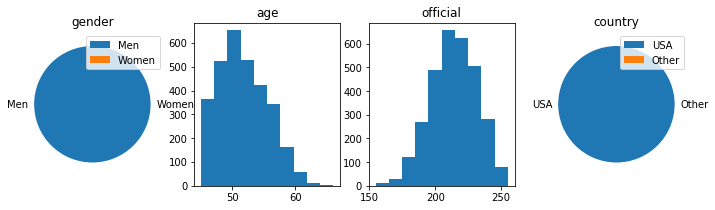

Number in Cluster 3072
Age mean:  51.920247395833336 Standard dev:  3.7175444742412904
Official mean:  214.03710937500037 Standard dev:  17.228422481137354


In [212]:
# There is a clear story here, but too many groups in my opinion.
y_pred = KMeans(n_clusters=16, random_state=42).fit_predict(standardized_df)
explore_df = main_df.copy()
explore_df['Kmeans8'] = y_pred


for i in range(16):
    df0 = explore_df[explore_df.Kmeans8 == i]
    fig, ax = plt.subplots(1,4, figsize=(12,3))
    ax[0].pie([len(df0[df0.gender == 1]),len(df0[df0.gender == 0])], labels = ['Men', 'Women'])
    ax[0].legend()
    ax[1].hist(df0.age)
    ax[2].hist(df0.official)
    ax[3].pie([len(df0[df0.country == 1]),len(df0[df0.country == 0])], labels = ['USA', 'Other'])
    ax[3].legend()
    for j in range(4):
        ax[j].set_title(df0.columns[j])
    plt.show()
    print('Number in Cluster', len(df0))
    print('Age mean: ', np.mean(df0.age), 'Standard dev: ', np.std(df0.age))
    print('Official mean: ', np.mean(df0.official), 'Standard dev: ', np.std(df0.official))

In [300]:
ms = MeanShift(bandwidth=.9, bin_seeding=True)
ms.fit(standardized_df)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 7


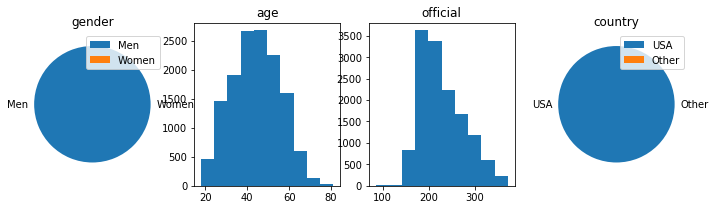

Number in Cluster 13787
Age mean:  44.1280191484732 Standard dev:  11.40994187088557
Official mean:  229.14191919924633 Standard dev:  47.37552030063162


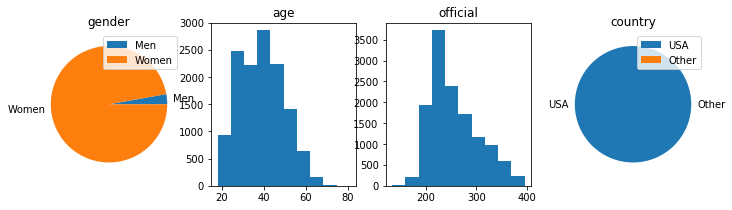

Number in Cluster 12970
Age mean:  38.91649961449499 Standard dev:  10.44831081322935
Official mean:  256.35190285273603 Standard dev:  47.32877042572115


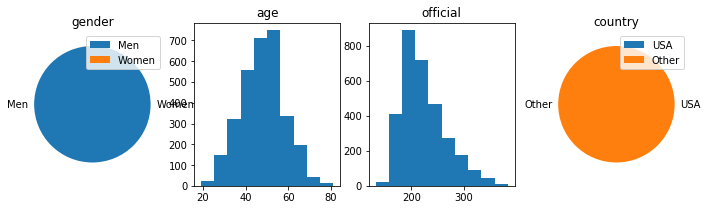

Number in Cluster 3099
Age mean:  47.78315585672798 Standard dev:  10.135612898770704
Official mean:  223.76234269119044 Standard dev:  41.88965091779664


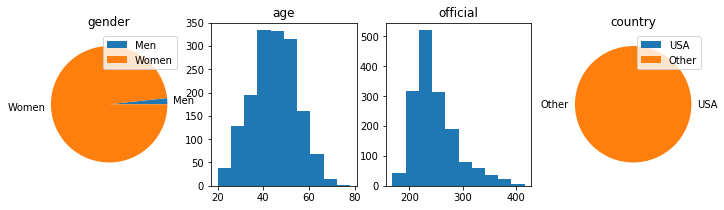

Number in Cluster 1588
Age mean:  44.6095717884131 Standard dev:  9.686195171207347
Official mean:  247.64564861460897 Standard dev:  41.46142419912274


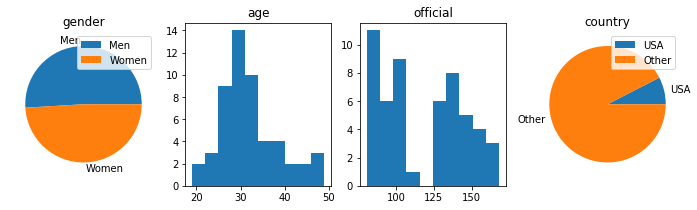

Number in Cluster 53
Age mean:  31.62264150943396 Standard dev:  6.611101056054983
Official mean:  118.20188679245283 Standard dev:  26.924394217645524


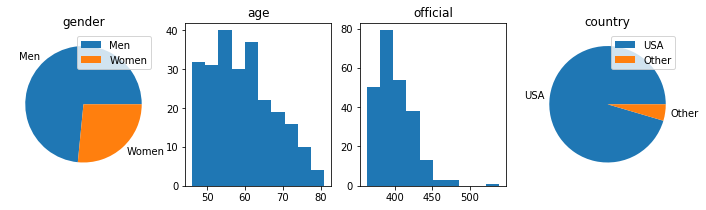

Number in Cluster 241
Age mean:  59.058091286307054 Standard dev:  8.458143641910175
Official mean:  400.7835684647306 Standard dev:  23.812225191986162


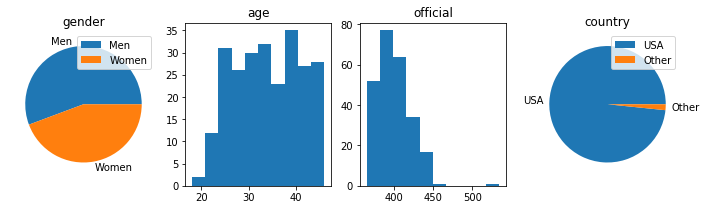

Number in Cluster 246
Age mean:  34.0609756097561 Standard dev:  6.95458127238455
Official mean:  400.03231707317104 Standard dev:  21.31036409360252


In [301]:
# This is terrible. There is a cluster with only 1 group
explore_df = main_df.copy()
explore_df['labels'] = labels

for i in range(n_clusters_):
    df0 = explore_df[explore_df.labels == i]
    fig, ax = plt.subplots(1,4, figsize=(12,3))
    ax[0].pie([len(df0[df0.gender == 1]),len(df0[df0.gender == 0])], labels = ['Men', 'Women'])
    ax[0].legend()
    ax[1].hist(df0.age)
    ax[2].hist(df0.official)
    ax[3].pie([len(df0[df0.country == 1]),len(df0[df0.country == 0])], labels = ['USA', 'Other'])
    ax[3].legend()
    for j in range(4):
        ax[j].set_title(df0.columns[j])
    plt.show()
    print('Number in Cluster', len(df0))
    print('Age mean: ', np.mean(df0.age), 'Standard dev: ', np.std(df0.age))
    print('Official mean: ', np.mean(df0.official), 'Standard dev: ', np.std(df0.official))

In [215]:
n_clusters=10
n = 4000

sample_df = main_df.sample(n)
sample_stand_df = pd.DataFrame()
for column in sample_df:
    sample_stand_df[column] = (sample_df[column] - np.mean(sample_df[column]))/(np.std(sample_df[column]))
    
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(sample_stand_df)

predict=sc.fit_predict(sample_stand_df)

labels = sc.labels_


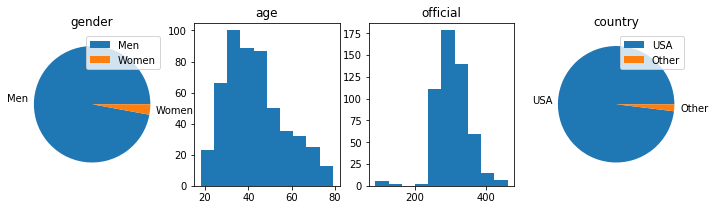

Number in Cluster 520
Age mean:  43.238461538461536 Standard dev:  13.393628706994544
Official mean:  306.8264423076922 Standard dev:  48.049015500965865


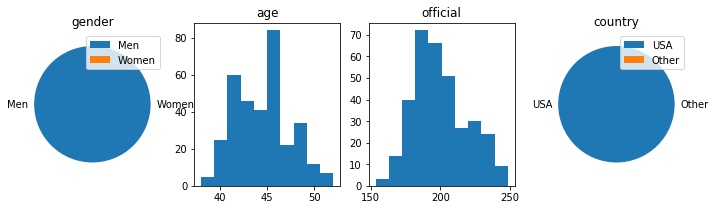

Number in Cluster 336
Age mean:  44.43452380952381 Standard dev:  2.8684239096799455
Official mean:  199.80669642857148 Standard dev:  19.103242824396187


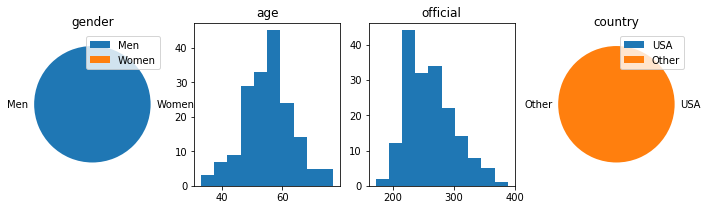

Number in Cluster 174
Age mean:  55.14367816091954 Standard dev:  8.18233591059979
Official mean:  259.6328735632183 Standard dev:  39.24031838740524


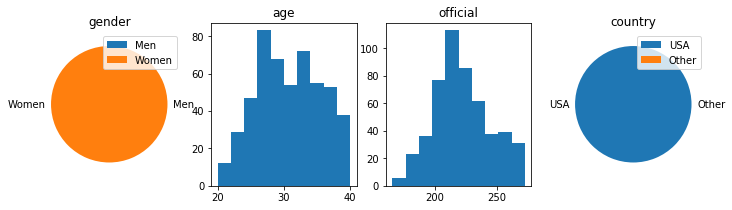

Number in Cluster 511
Age mean:  30.28767123287671 Standard dev:  4.838429078400002
Official mean:  221.79651663405076 Standard dev:  22.41110994401913


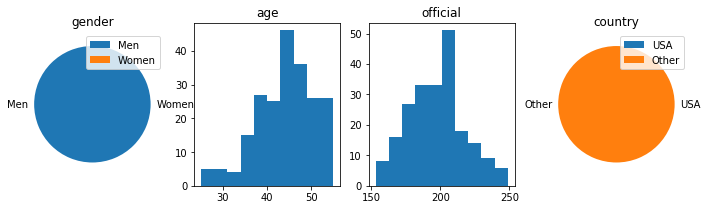

Number in Cluster 215
Age mean:  43.69767441860465 Standard dev:  6.614061425868339
Official mean:  197.6 Standard dev:  20.146370577398315


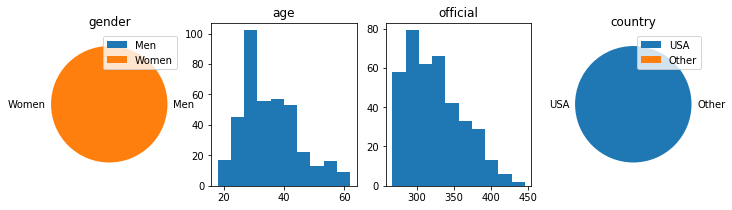

Number in Cluster 390
Age mean:  35.21025641025641 Standard dev:  9.249914618366713
Official mean:  324.66071794871823 Standard dev:  37.09404109304829


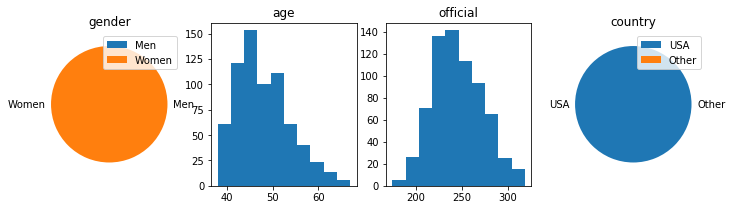

Number in Cluster 690
Age mean:  47.89565217391304 Standard dev:  6.015015866896531
Official mean:  245.21721739130427 Standard dev:  26.73236793020101


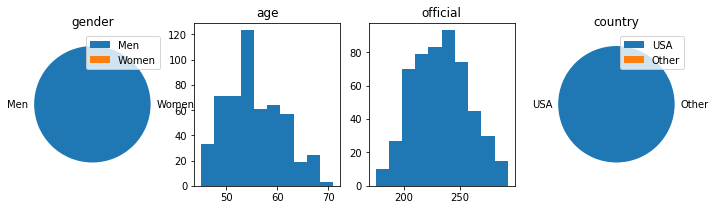

Number in Cluster 526
Age mean:  55.41634980988593 Standard dev:  5.458070278294712
Official mean:  233.07730038022785 Standard dev:  24.364698157091897


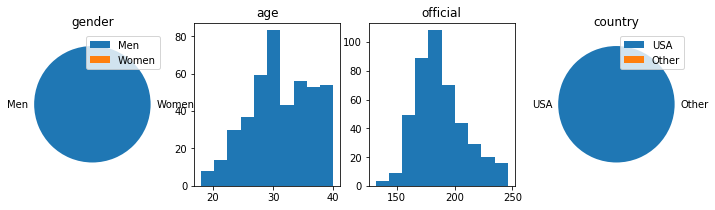

Number in Cluster 437
Age mean:  31.08924485125858 Standard dev:  5.141369754625499
Official mean:  187.82519450800925 Standard dev:  21.756490049801446


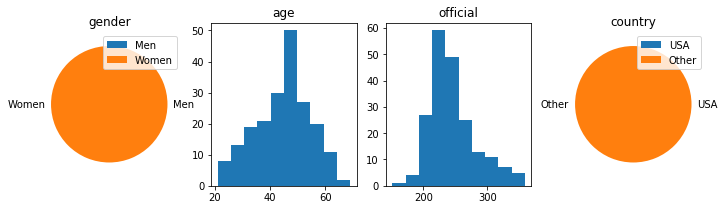

Number in Cluster 201
Age mean:  44.39303482587065 Standard dev:  9.78524380189215
Official mean:  245.49910447761198 Standard dev:  36.528385325954694


In [218]:
# Not splitting by age or speed very well. Not really finding any interesting groups.
explore_df = sample_df.copy()
explore_df['labels'] = labels

for i in range(10):
    df0 = explore_df[explore_df.labels == i]
    fig, ax = plt.subplots(1,4, figsize=(12,3))
    ax[0].pie([len(df0[df0.gender == 1]),len(df0[df0.gender == 0])], labels = ['Men', 'Women'])
    ax[0].legend()
    ax[1].hist(df0.age)
    ax[2].hist(df0.official)
    ax[3].pie([len(df0[df0.country == 1]),len(df0[df0.country == 0])], labels = ['USA', 'Other'])
    ax[3].legend()
    for j in range(4):
        ax[j].set_title(df0.columns[j])
    plt.show()
    print('Number in Cluster', len(df0))
    print('Age mean: ', np.mean(df0.age), 'Standard dev: ', np.std(df0.age))
    print('Official mean: ', np.mean(df0.official), 'Standard dev: ', np.std(df0.official))

In [224]:
af = AffinityPropagation(damping=.93).fit(sample_stand_df)

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Estimated number of clusters: 67


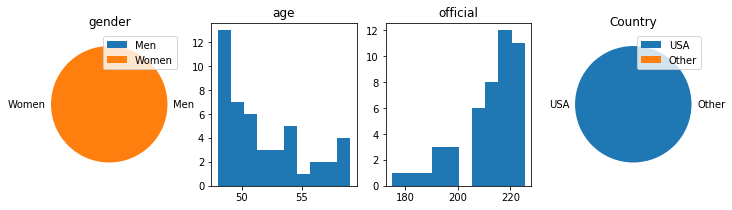

Number in Cluster 46
Age mean:  51.82608695652174 Standard dev:  3.2857025443320134
Official mean:  212.01195652173908 Standard dev:  11.713660664882804


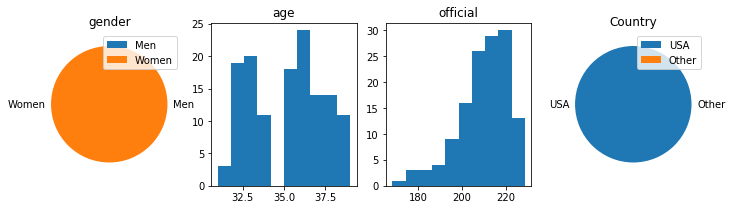

Number in Cluster 134
Age mean:  35.134328358208954 Standard dev:  2.2685094217698323
Official mean:  209.73656716417918 Standard dev:  11.53493209190639


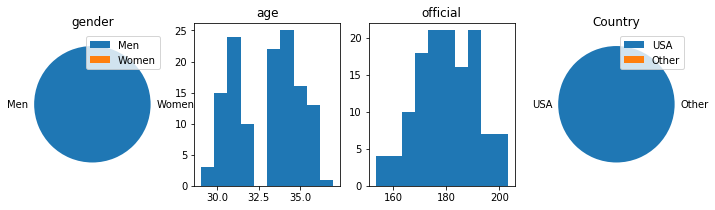

Number in Cluster 129
Age mean:  32.883720930232556 Standard dev:  1.9868868835471056
Official mean:  180.2744961240309 Standard dev:  11.06755919824123


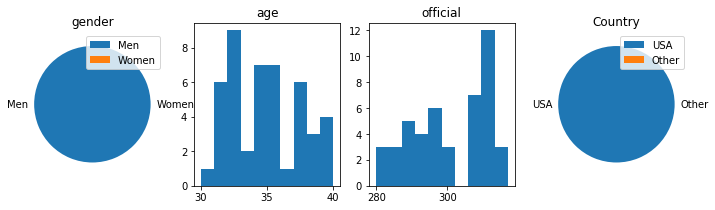

Number in Cluster 46
Age mean:  34.391304347826086 Standard dev:  2.6578698635787696
Official mean:  300.9534782608696 Standard dev:  10.661017819381954


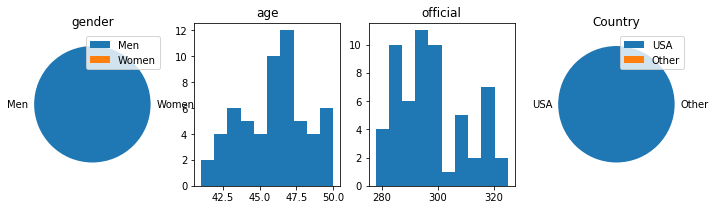

Number in Cluster 58
Age mean:  46.0 Standard dev:  2.4774848202325597
Official mean:  297.6936206896552 Standard dev:  12.302072112856305


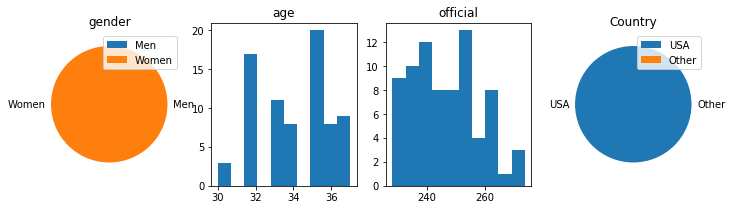

Number in Cluster 76
Age mean:  34.078947368421055 Standard dev:  1.8479231435853436
Official mean:  246.7280263157894 Standard dev:  11.580171121785455


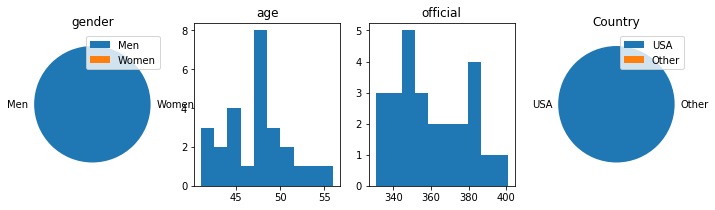

Number in Cluster 26
Age mean:  47.11538461538461 Standard dev:  3.587659651520463
Official mean:  360.23730769230775 Standard dev:  19.207117382264702


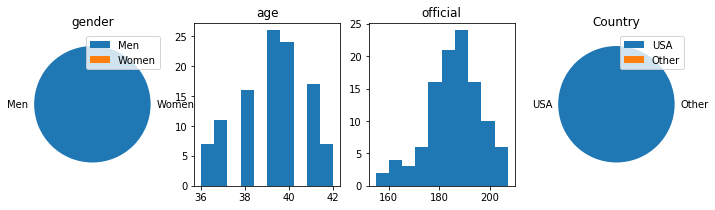

Number in Cluster 108
Age mean:  39.18518518518518 Standard dev:  1.5936688869592706
Official mean:  185.65398148148145 Standard dev:  10.526197032291389


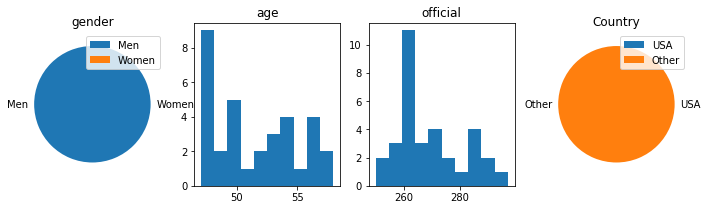

Number in Cluster 33
Age mean:  51.45454545454545 Standard dev:  3.394209945926267
Official mean:  269.1739393939394 Standard dev:  12.011007057769193


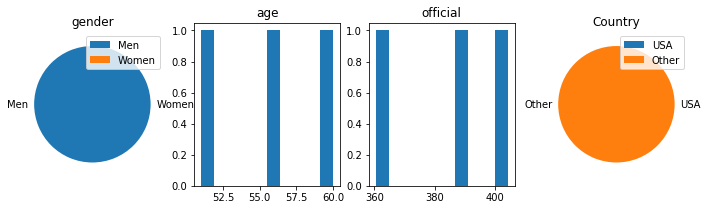

Number in Cluster 3
Age mean:  55.666666666666664 Standard dev:  3.6817870057290873
Official mean:  384.32 Standard dev:  18.12930408666221


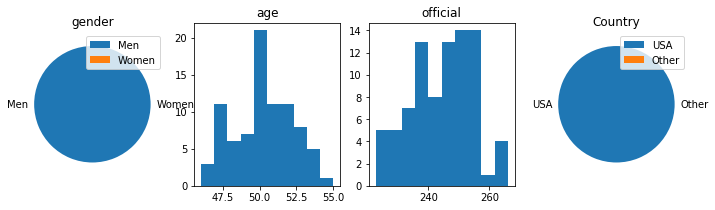

Number in Cluster 84
Age mean:  50.214285714285715 Standard dev:  2.1988710770769253
Official mean:  244.32190476190482 Standard dev:  10.07415132620662


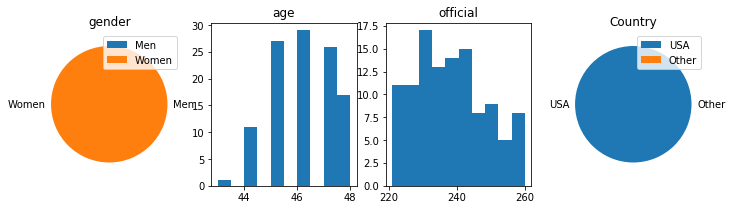

Number in Cluster 111
Age mean:  46.072072072072075 Standard dev:  1.249949272568612
Official mean:  238.36936936936928 Standard dev:  10.387390248704513


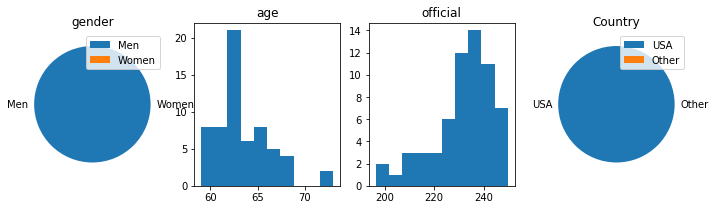

Number in Cluster 62
Age mean:  63.46774193548387 Standard dev:  2.872100175354905
Official mean:  231.32951612903227 Standard dev:  12.231448418361177


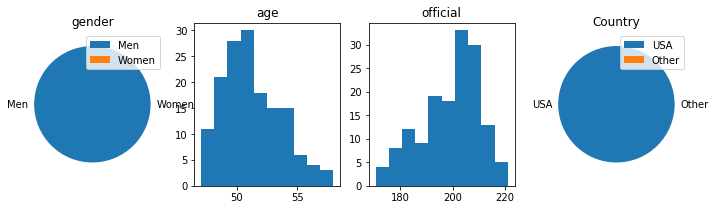

Number in Cluster 151
Age mean:  51.35099337748344 Standard dev:  2.217326937621178
Official mean:  199.37225165562907 Standard dev:  11.25642940177154


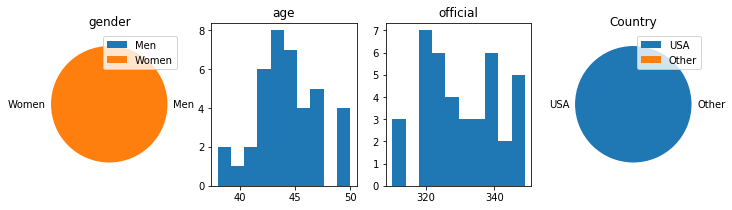

Number in Cluster 39
Age mean:  44.15384615384615 Standard dev:  2.7784746003043623
Official mean:  330.4225641025641 Standard dev:  10.723055132474888


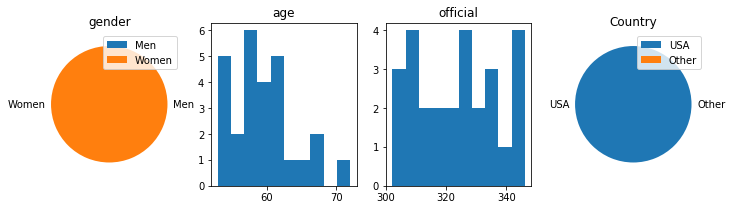

Number in Cluster 27
Age mean:  59.51851851851852 Standard dev:  4.748257929048103
Official mean:  323.76629629629633 Standard dev:  13.397795326691337


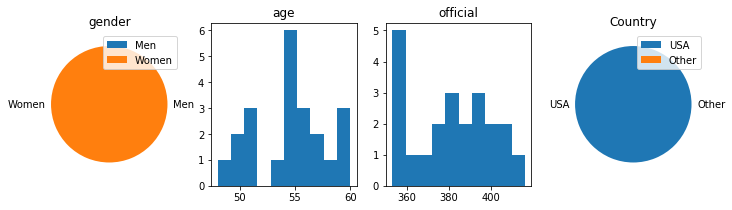

Number in Cluster 22
Age mean:  54.45454545454545 Standard dev:  3.2012394293925466
Official mean:  381.765 Standard dev:  19.202606061299452


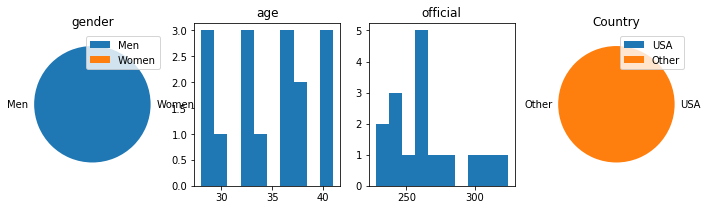

Number in Cluster 16
Age mean:  34.75 Standard dev:  4.293891009329417
Official mean:  263.243125 Standard dev:  27.160951916020448


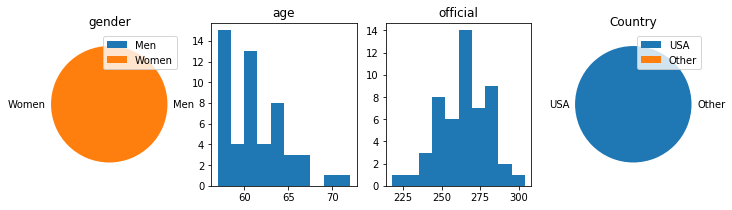

Number in Cluster 52
Age mean:  61.21153846153846 Standard dev:  3.2482926785380326
Official mean:  263.97942307692307 Standard dev:  16.519729627776965


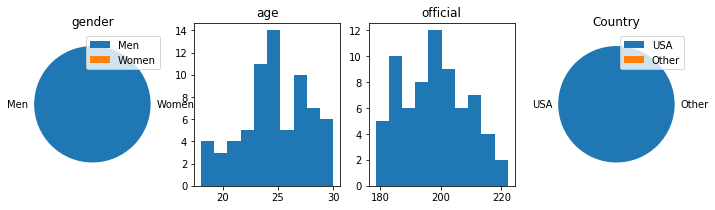

Number in Cluster 69
Age mean:  24.579710144927535 Standard dev:  2.931121351932082
Official mean:  197.72115942028987 Standard dev:  10.59942526965726


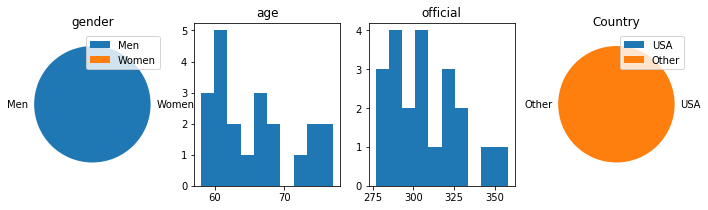

Number in Cluster 21
Age mean:  65.71428571428571 Standard dev:  5.913204410009671
Official mean:  306.38142857142856 Standard dev:  21.71633843680929


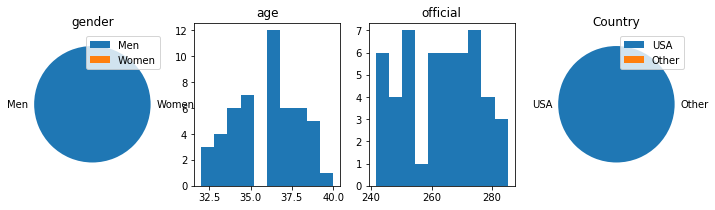

Number in Cluster 50
Age mean:  35.88 Standard dev:  2.02622802270623
Official mean:  263.0412 Standard dev:  12.142769805938016


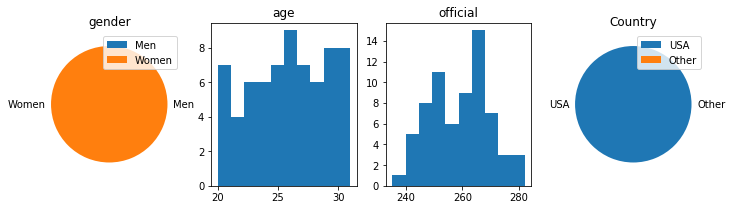

Number in Cluster 68
Age mean:  25.823529411764707 Standard dev:  2.925251002154437
Official mean:  259.34382352941174 Standard dev:  10.609019474209301


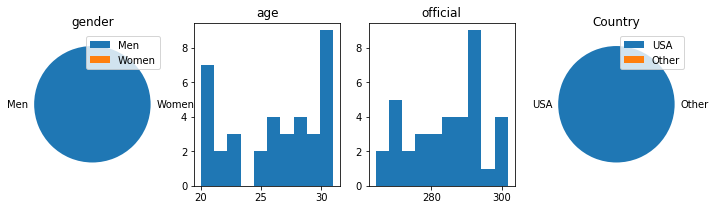

Number in Cluster 37
Age mean:  26.027027027027028 Standard dev:  3.6649286449046325
Official mean:  284.73621621621623 Standard dev:  10.743499945938742


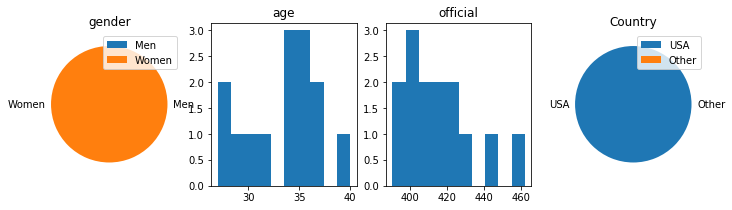

Number in Cluster 14
Age mean:  33.42857142857143 Standard dev:  3.717031951787911
Official mean:  415.0557142857143 Standard dev:  19.334807514755692


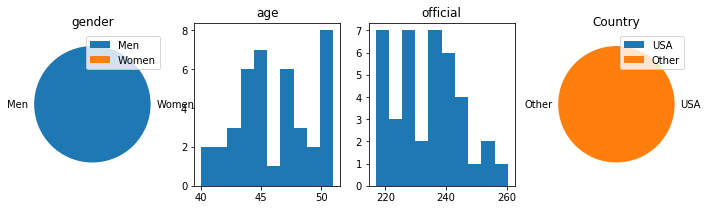

Number in Cluster 40
Age mean:  46.15 Standard dev:  2.920188350089768
Official mean:  233.67925 Standard dev:  10.7731157024094


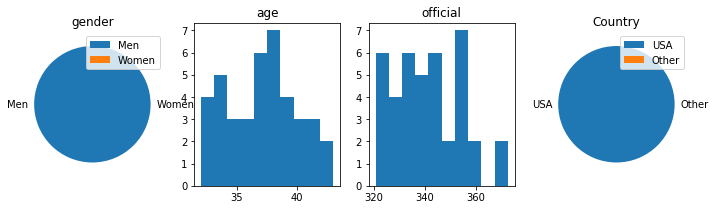

Number in Cluster 40
Age mean:  37.15 Standard dev:  2.6976841920432424
Official mean:  341.23025 Standard dev:  13.048515334607995


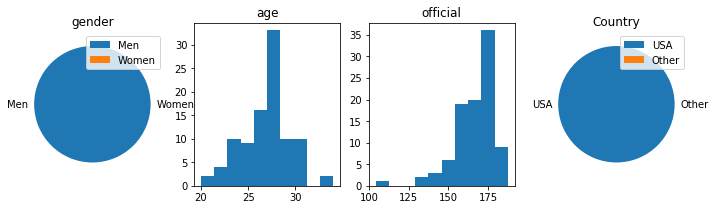

Number in Cluster 96
Age mean:  26.822916666666668 Standard dev:  2.479057245484438
Official mean:  166.021875 Standard dev:  12.871861859667971


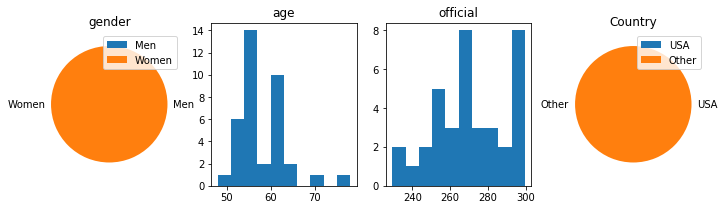

Number in Cluster 37
Age mean:  57.7027027027027 Standard dev:  5.593745855453044
Official mean:  271.2556756756757 Standard dev:  19.212064697706694


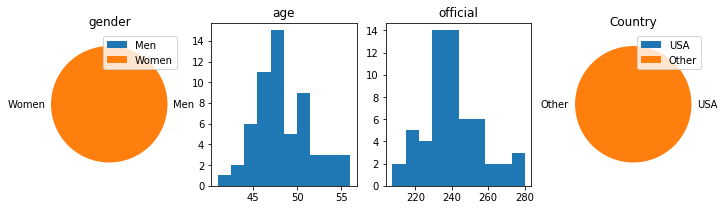

Number in Cluster 58
Age mean:  48.189655172413794 Standard dev:  3.1374099605254466
Official mean:  240.50293103448277 Standard dev:  15.714359346944402


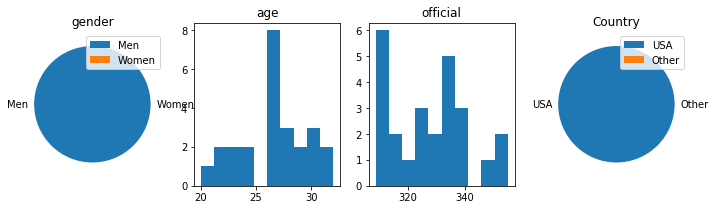

Number in Cluster 25
Age mean:  26.56 Standard dev:  3.020993214159873
Official mean:  327.37120000000004 Standard dev:  13.121462516045993


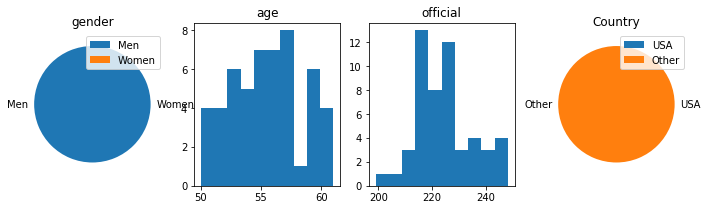

Number in Cluster 52
Age mean:  55.48076923076923 Standard dev:  2.706760657028595
Official mean:  224.44769230769228 Standard dev:  10.834153727091403


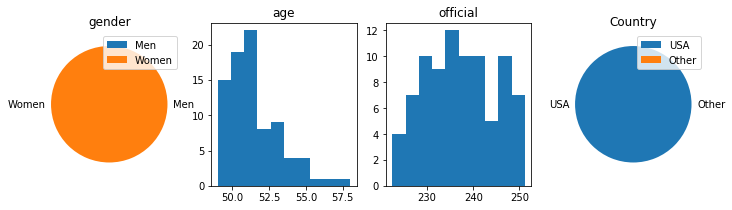

Number in Cluster 84
Age mean:  51.273809523809526 Standard dev:  1.9721343917078566
Official mean:  237.34238095238098 Standard dev:  7.502245952450891


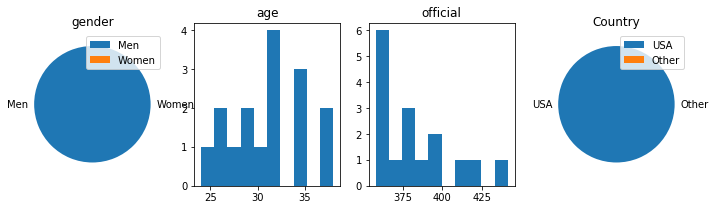

Number in Cluster 16
Age mean:  31.0 Standard dev:  3.905124837953327
Official mean:  382.79187499999995 Standard dev:  23.13235510566045


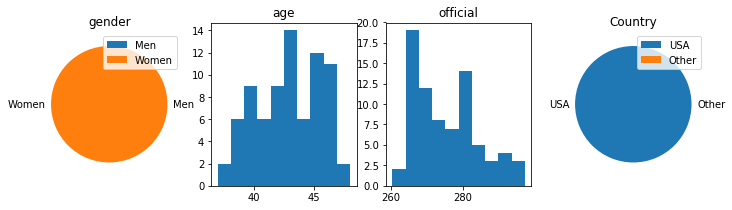

Number in Cluster 77
Age mean:  42.857142857142854 Standard dev:  2.4532739096349867
Official mean:  275.45987012987024 Standard dev:  8.912686637597938


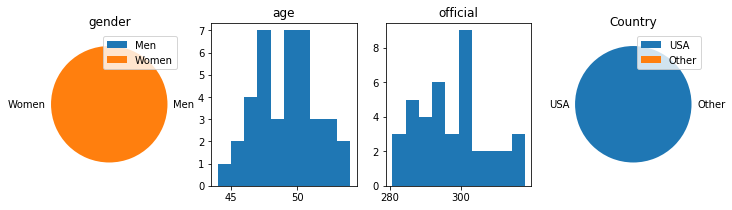

Number in Cluster 39
Age mean:  48.717948717948715 Standard dev:  2.3088316275877796
Official mean:  297.3115384615385 Standard dev:  9.84809848584904


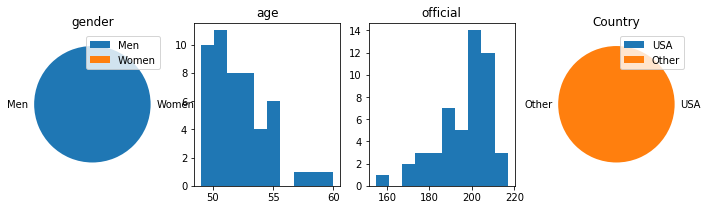

Number in Cluster 50
Age mean:  52.4 Standard dev:  2.2627416997969525
Official mean:  196.43379999999996 Standard dev:  12.296435400554097


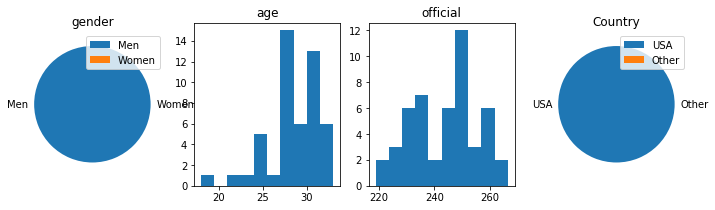

Number in Cluster 49
Age mean:  28.346938775510203 Standard dev:  3.0676123827735213
Official mean:  243.67448979591842 Standard dev:  11.754303260842603


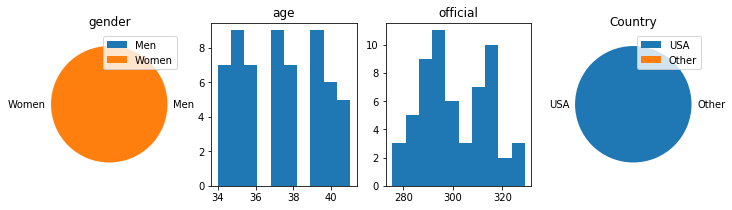

Number in Cluster 59
Age mean:  37.28813559322034 Standard dev:  2.1710799269974124
Official mean:  300.7808474576272 Standard dev:  13.213742882950715


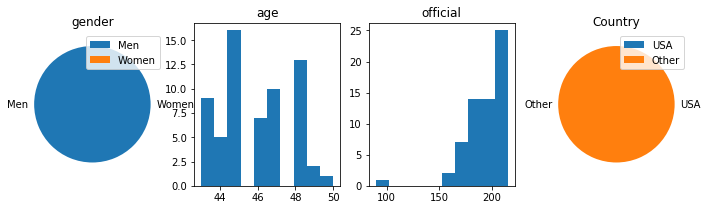

Number in Cluster 63
Age mean:  45.888888888888886 Standard dev:  1.8353764469285416
Official mean:  192.34253968253972 Standard dev:  18.75425064777413


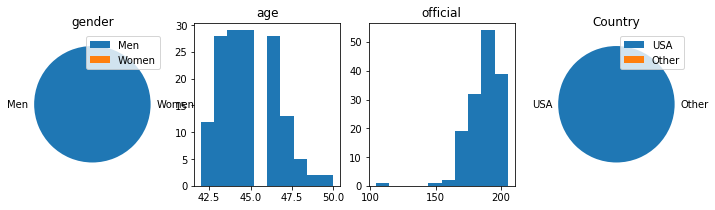

Number in Cluster 148
Age mean:  44.770270270270274 Standard dev:  1.7402026699092796
Official mean:  187.19216216216216 Standard dev:  13.013269035900638


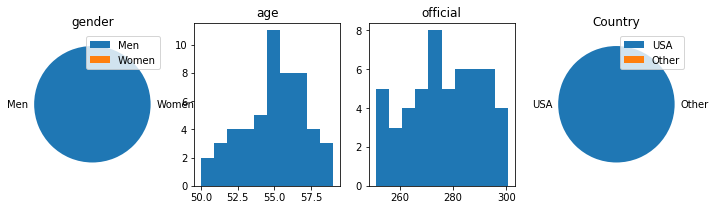

Number in Cluster 52
Age mean:  55.01923076923077 Standard dev:  2.3162501576685117
Official mean:  277.23 Standard dev:  13.585461120114907


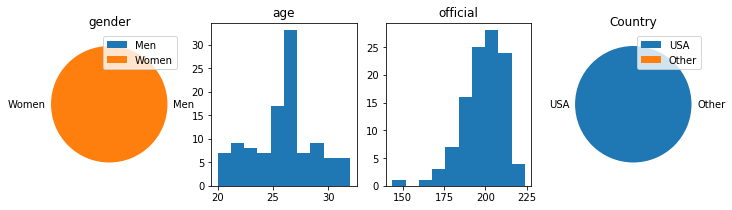

Number in Cluster 109
Age mean:  25.798165137614678 Standard dev:  2.7983606489073956
Official mean:  198.75844036697256 Standard dev:  12.356112640547332


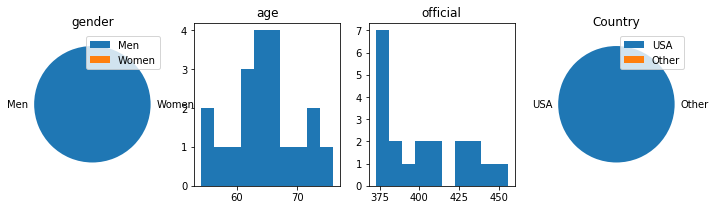

Number in Cluster 20
Age mean:  64.55 Standard dev:  5.607807058021878
Official mean:  400.92400000000004 Standard dev:  26.195610968251913


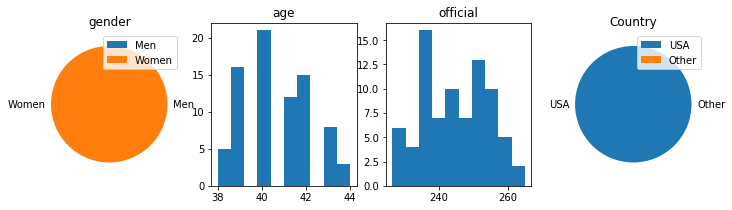

Number in Cluster 80
Age mean:  40.65 Standard dev:  1.5580436450882875
Official mean:  244.9025 Standard dev:  9.50175398281812


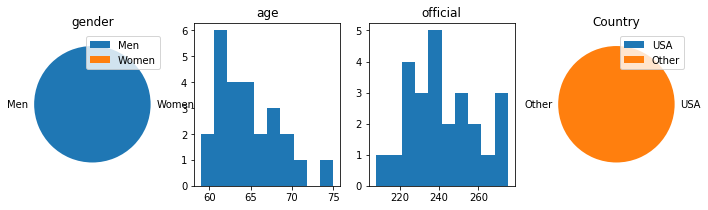

Number in Cluster 25
Age mean:  64.64 Standard dev:  3.69735040265323
Official mean:  242.07240000000002 Standard dev:  17.256730693848127


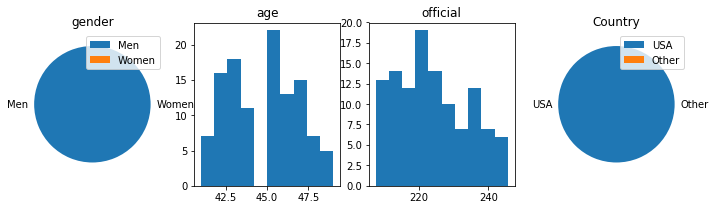

Number in Cluster 114
Age mean:  44.6578947368421 Standard dev:  2.1797671989346137
Official mean:  224.0364912280701 Standard dev:  10.18506560473373


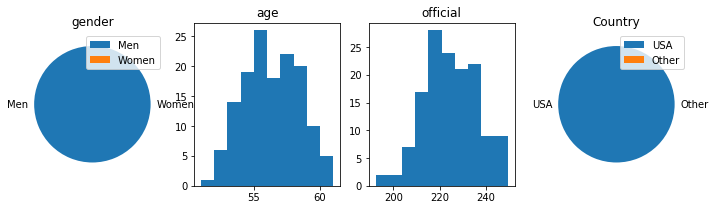

Number in Cluster 141
Age mean:  55.843971631205676 Standard dev:  2.1080180868565495
Official mean:  224.74907801418436 Standard dev:  11.517990854933831


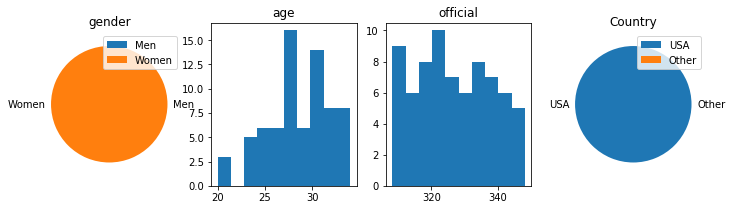

Number in Cluster 72
Age mean:  28.416666666666668 Standard dev:  3.277660073216189
Official mean:  326.728888888889 Standard dev:  11.013413230586341


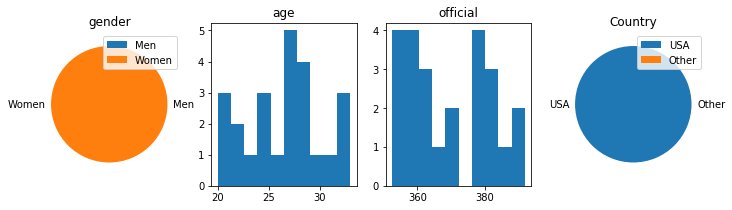

Number in Cluster 24
Age mean:  26.583333333333332 Standard dev:  3.740729281243907
Official mean:  369.30583333333334 Standard dev:  11.945398317855389


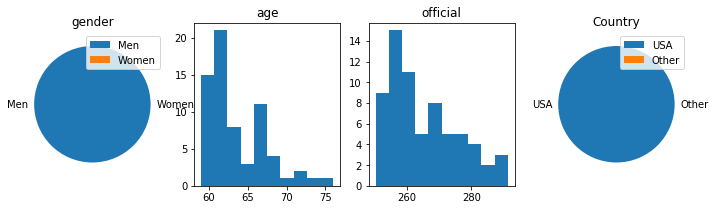

Number in Cluster 67
Age mean:  63.582089552238806 Standard dev:  3.6534557500199085
Official mean:  265.1670149253731 Standard dev:  10.593688773774605


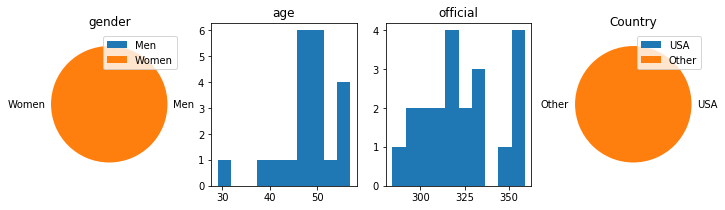

Number in Cluster 21
Age mean:  47.904761904761905 Standard dev:  6.093749818303388
Official mean:  323.55380952380955 Standard dev:  21.73810270693034


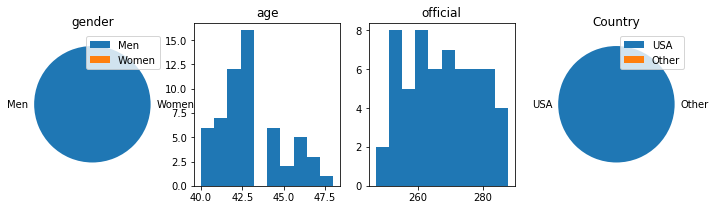

Number in Cluster 58
Age mean:  42.96551724137931 Standard dev:  1.9736673132764395
Official mean:  267.2870689655172 Standard dev:  10.670854603112208


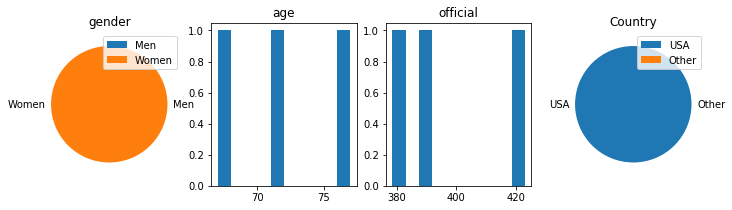

Number in Cluster 3
Age mean:  71.66666666666667 Standard dev:  4.109609335312651
Official mean:  396.6499999999999 Standard dev:  19.09496268653072


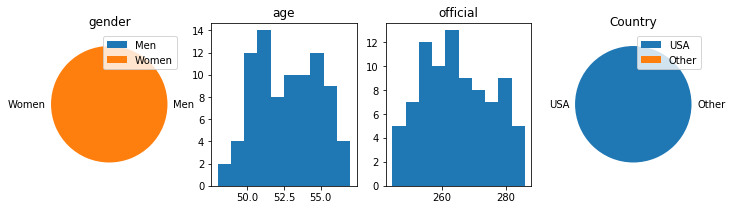

Number in Cluster 85
Age mean:  52.752941176470586 Standard dev:  2.3857709685103567
Official mean:  264.83235294117645 Standard dev:  10.544754887627231


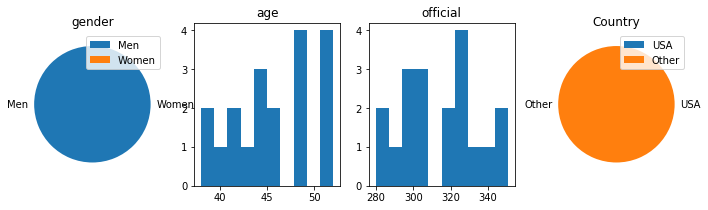

Number in Cluster 19
Age mean:  45.578947368421055 Standard dev:  4.246556369251433
Official mean:  314.45736842105265 Standard dev:  20.254280858001167


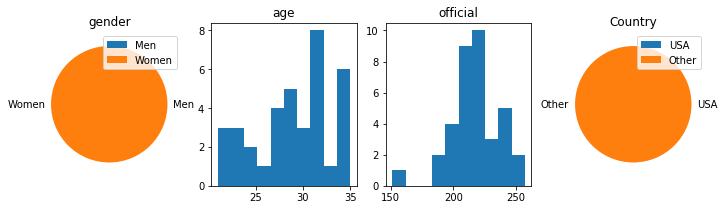

Number in Cluster 36
Age mean:  28.944444444444443 Standard dev:  4.054794449129494
Official mean:  216.98638888888888 Standard dev:  19.976091286109693


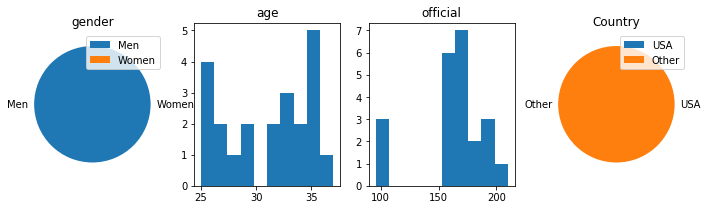

Number in Cluster 22
Age mean:  31.181818181818183 Standard dev:  3.7372372347444482
Official mean:  163.68727272727273 Standard dev:  27.96099851608538


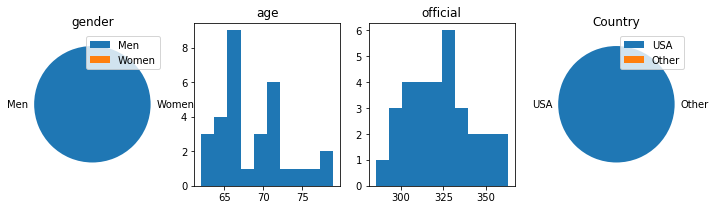

Number in Cluster 31
Age mean:  68.64516129032258 Standard dev:  4.3295562396220175
Official mean:  322.5861290322581 Standard dev:  19.277282079443857


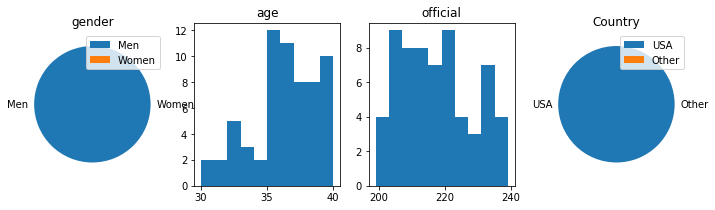

Number in Cluster 63
Age mean:  35.888888888888886 Standard dev:  2.582671872988774
Official mean:  217.46666666666673 Standard dev:  10.814689011372376


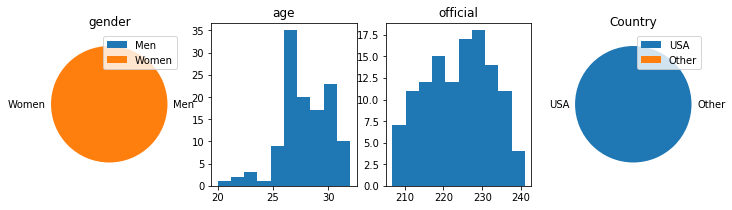

Number in Cluster 121
Age mean:  27.84297520661157 Standard dev:  2.230547738619671
Official mean:  223.7926446280992 Standard dev:  8.543737716185285


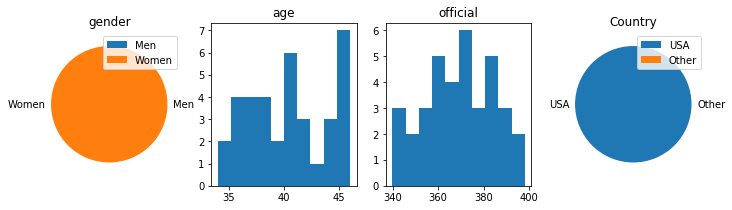

Number in Cluster 36
Age mean:  40.333333333333336 Standard dev:  3.5118845842842465
Official mean:  369.0441666666667 Standard dev:  14.813545485842042


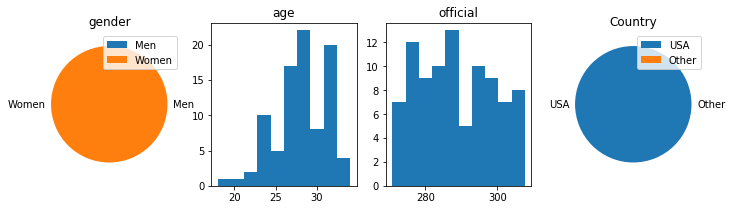

Number in Cluster 90
Age mean:  28.133333333333333 Standard dev:  3.1804961178337496
Official mean:  288.50722222222225 Standard dev:  10.17565362659299


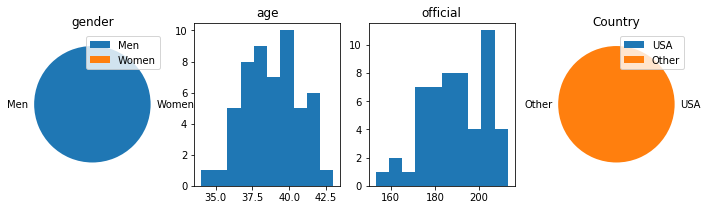

Number in Cluster 53
Age mean:  38.867924528301884 Standard dev:  2.065326835563866
Official mean:  189.25886792452832 Standard dev:  13.799333270792653


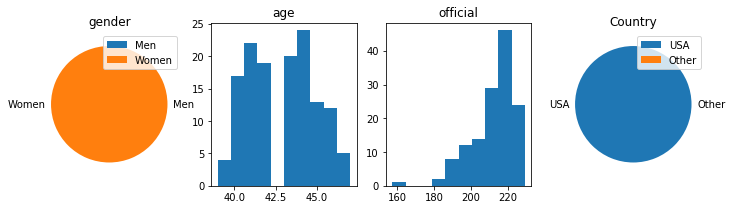

Number in Cluster 136
Age mean:  42.8235294117647 Standard dev:  2.0718077959242738
Official mean:  212.26433823529405 Standard dev:  11.50806703643182


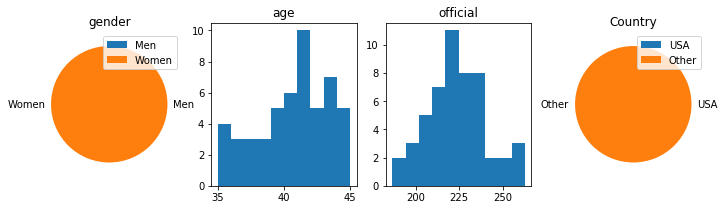

Number in Cluster 51
Age mean:  40.23529411764706 Standard dev:  2.762410394565698
Official mean:  222.87745098039224 Standard dev:  16.82074639214246


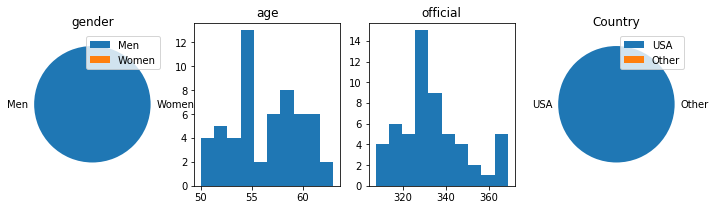

Number in Cluster 56
Age mean:  56.32142857142857 Standard dev:  3.40748725423223
Official mean:  334.1239285714285 Standard dev:  15.149487695082943


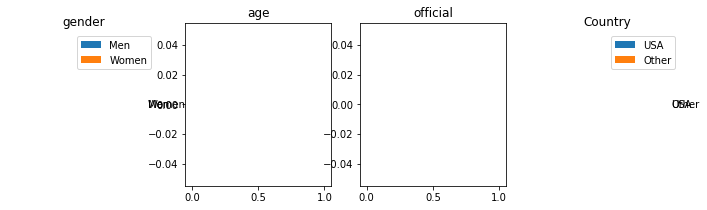

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


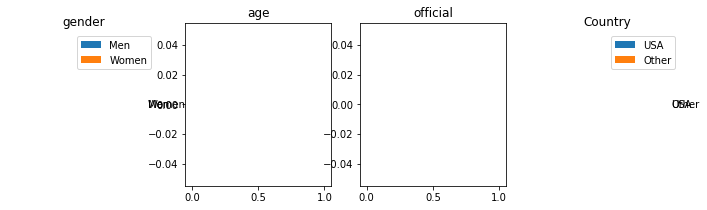

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


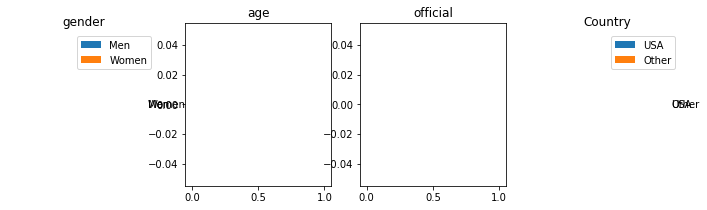

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


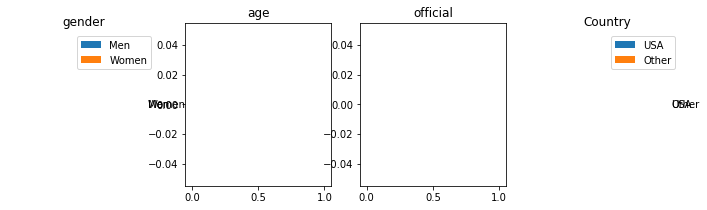

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


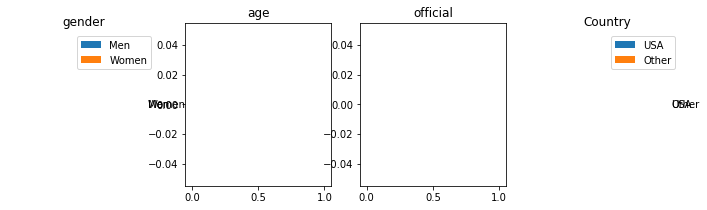

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


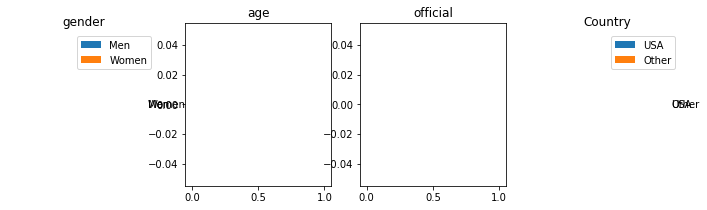

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


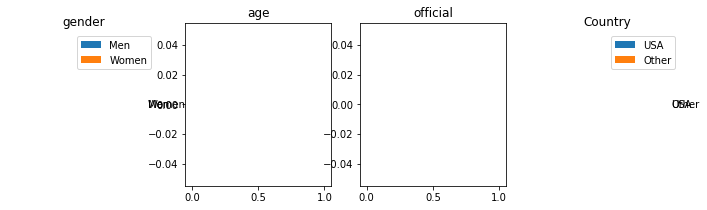

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


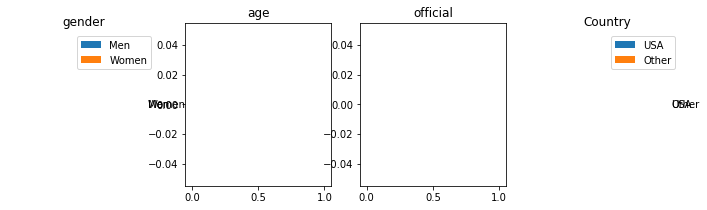

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


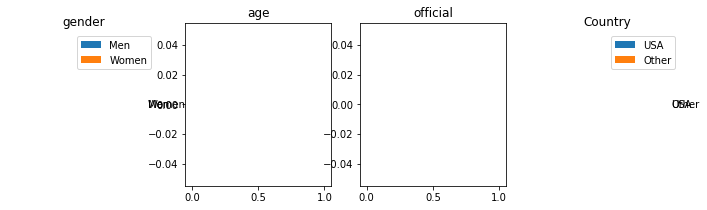

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


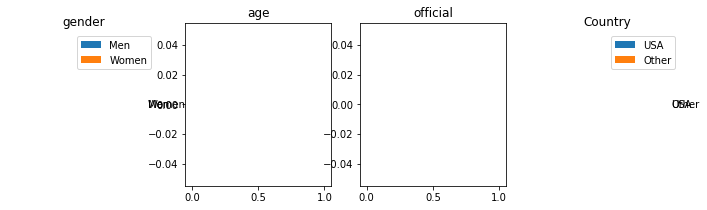

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


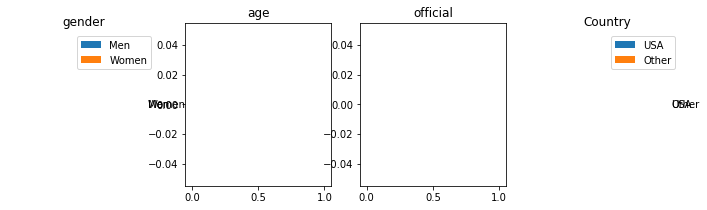

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


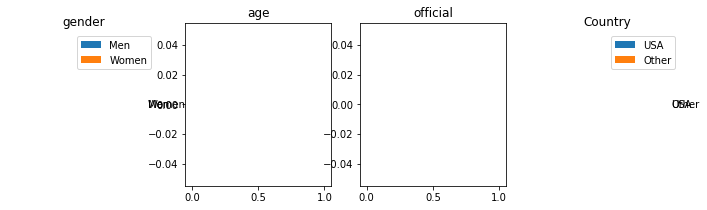

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


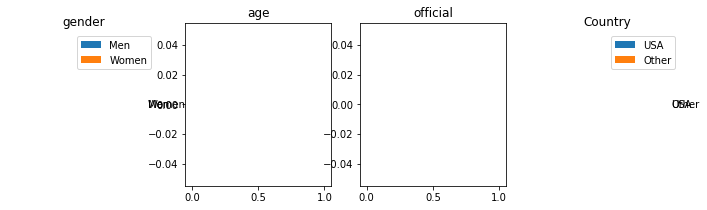

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


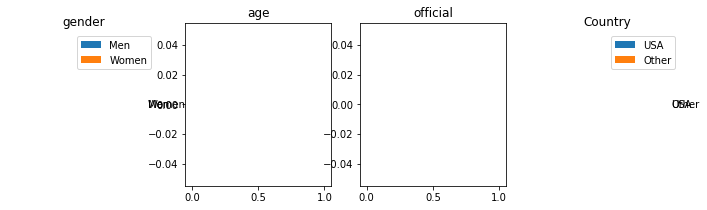

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


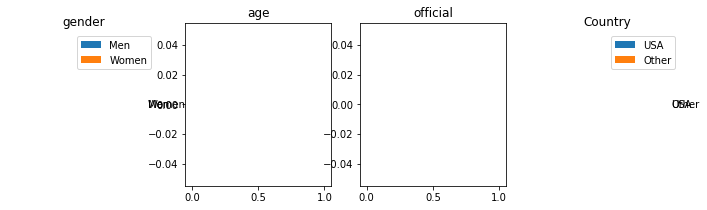

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


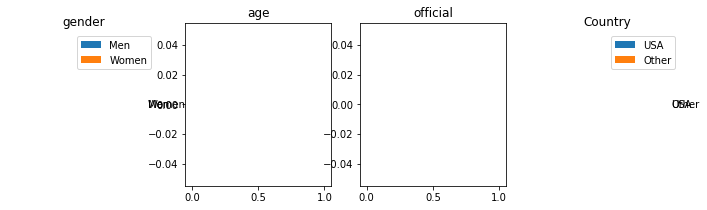

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


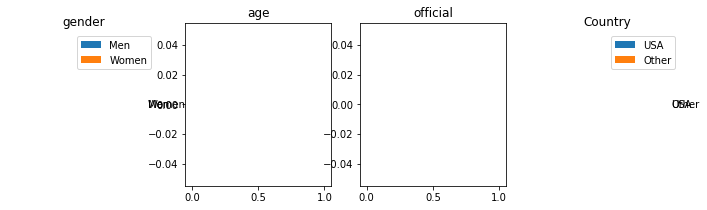

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


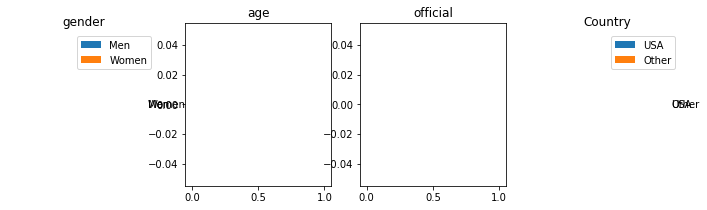

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


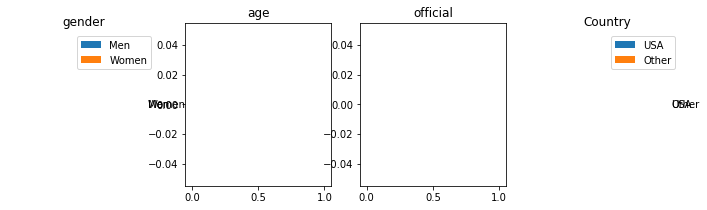

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


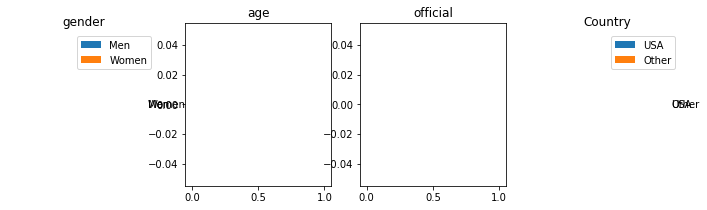

Number in Cluster 0
Age mean:  nan Standard dev:  nan
Official mean:  nan Standard dev:  nan


In [226]:
explore_df = sample_df.copy()
explore_df['labels'] = labels

for i in range(87):
    df0 = explore_df[explore_df.labels == i]
    fig, ax = plt.subplots(1,4, figsize=(12,3))
    ax[0].pie([len(df0[df0.gender == 1]),len(df0[df0.gender == 0])], labels = ['Men', 'Women'])
    ax[0].legend()
    ax[1].hist(df0.age)
    ax[2].hist(df0.official)
    ax[3].pie([len(df0[df0.country == 1]),len(df0[df0.country == 0])], labels = ['USA', 'Other'])
    ax[3].legend()
    for j in range(3):
        ax[j].set_title(df0.columns[j])
    ax[3].set_title('Country')
    plt.show()
    print('Number in Cluster', len(df0))
    print('Age mean: ', np.mean(df0.age), 'Standard dev: ', np.std(df0.age))
    print('Official mean: ', np.mean(df0.official), 'Standard dev: ', np.std(df0.official))